In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['googleplaystore_user_reviews.csv', 'googleplaystore.csv']


In [2]:
# Use a "Nan" list as a filter to unify missing values


# import the dataset
# and imidately replace all the na values
# TIPP from a Kaggle notebook:
## use “df.sample()” insdead of "df.head()" could give a more random view in case that the dataset has already been sorted.

nan_list = ['na','nan','--'] # list of all the na values in the dataset
df= pd.read_csv('input/googleplaystore.csv',na_values = nan_list)
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3337,Internet Speed Meter Lite,TOOLS,4.5,410303,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"September 5, 2016",Varies with device,Varies with device
2540,PatientPORTAL by InteliChart,MEDICAL,NaN,1,32M,500+,Free,0,Everyone,Medical,"May 24, 2018",1.0.1,5.0 and up
7235,CrossFire: Legends,GAME,4.3,144040,29M,"5,000,000+",Free,0,Teen,Action,"July 25, 2018",1.0.9.10,4.0 and up
562,Find Real Love — YouLove Premium Dating,DATING,4.5,212626,11M,"10,000,000+",Free,0,Mature 17+,Dating,"July 31, 2018",4.17.2,4.1 and up
8717,Dash Quest Heroes,GAME,4.3,8432,59M,"500,000+",Free,0,Everyone 10+,Adventure,"July 16, 2018",1.4.0,4.1 and up
10059,My Ex Girlfriend Comes Back,FAMILY,3.7,3258,26M,"500,000+",Free,0,Everyone,Casual,"March 4, 2016",1.0.0,2.3 and up
1523,Aviary Stickers: Free Pack,LIBRARIES_AND_DEMO,3.5,126862,624k,"10,000,000+",Free,0,Everyone,Libraries & Demo,"January 17, 2012",1.0,2.2 and up
2421,Dosecast - Medication Reminder,MEDICAL,4.3,4107,Varies with device,"100,000+",Free,0,Everyone,Medical,"April 17, 2018",Varies with device,Varies with device
7735,CQ Ukraine,PRODUCTIVITY,NaN,0,9.1M,10+,Free,0,Everyone,Productivity,"June 25, 2018",1.17.0,4.1 and up
900,Marcus Theatres,ENTERTAINMENT,3.6,2639,8.5M,"100,000+",Free,0,Everyone,Entertainment,"February 7, 2018",2.9.43,6.0 and up


In [3]:
# replace all the " " with "_" in the column name and lowercase them
## makes it easier to work with them
try:
    df.columns=[str(col).replace(' ','_').lower() for col in df.columns]
except KeyError:
    pass

In [4]:
# we can see the new names of all the columns and that they are all non-null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
app               10841 non-null object
category          10841 non-null object
rating            9367 non-null float64
reviews           10841 non-null object
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10840 non-null object
genres            10841 non-null object
last_updated      10841 non-null object
current_ver       10833 non-null object
android_ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# check the columns for NAN values
# => we see rating has a lot of nan values (more than 10%)
# OK? - we see that we have some duplicated names (10841-9660)
print('Number of apps in the dataset : ' , len(df))
print('Amount of unique app names: ', df['app'].nunique())
df.isnull().sum()

Number of apps in the dataset :  10841
Amount of unique app names:  9660


app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

In [6]:
# so lets get rid of them
df.drop_duplicates(subset='app', inplace=True)

In [7]:
# ok looks better now but we still got a lot of nan values in rating
print('Number of apps in the dataset : ' , len(df))
print('Amount of unique app names: ', df['app'].nunique())
df.isnull().sum()

Number of apps in the dataset :  9660
Amount of unique app names:  9660


app                  0
category             0
rating            1463
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

In [8]:
# now lets clean the values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
app               9660 non-null object
category          9660 non-null object
rating            8197 non-null float64
reviews           9660 non-null object
size              9660 non-null object
installs          9660 non-null object
type              9659 non-null object
price             9660 non-null object
content_rating    9659 non-null object
genres            9660 non-null object
last_updated      9660 non-null object
current_ver       9652 non-null object
android_ver       9657 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [9]:
# start with the installs
# first we see that there is a wrong value in there: "Paid"
print(df['installs'].unique())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [10]:
# so lets get rid of it first
df = df[df['installs'] != 'Free']
# and then remove + and ,
# and convert it into int
df['installs'] = df['installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['installs'] = df['installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['installs'] = df['installs'].apply(lambda x: int(x))

# looks much better now :)
print(df['installs'].unique())

[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]


In [11]:
# next check the size
# so we see there are M and k values in there
print(df['size'].sample(20))

4162                   8.8M
9780     Varies with device
3836                   3.4M
10339                  9.2M
2390                    28M
9092                   9.8M
5932                    38M
2661     Varies with device
6427                   2.0M
6544                    34M
8180     Varies with device
2391                    21M
8736                   1.1M
8216                   5.2M
6063                   4.0M
2606     Varies with device
7924                    24M
8153                    23M
3455                   4.1M
28                     4.6M
Name: size, dtype: object


In [12]:
# so lets make them all k
# remove M => replace with k => divide by 10^3
# nan the string
df['size'] = df['size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['size'] = df['size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['size'] = df['size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['size'] = df['size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

df['size'] = df['size'].apply(lambda x: float(x))

print(df['size'].sample(20))

2066     43.00
6726     94.00
4919      3.00
5078     64.00
9595     24.00
9916      0.97
2028     20.00
1117       NaN
9903     18.00
997       3.60
7892      8.60
5887     13.00
7491       NaN
2878     51.00
10482    10.00
1850       NaN
913      12.00
10609    28.00
5945     33.00
5517     82.00
Name: size, dtype: float64


In [13]:
# next check the price
# so we see there are $-signs
print(df['price'].sample(20))

5143         0
9450         0
481      $7.99
4378         0
8017     $2.49
3564     $5.99
10196        0
4641         0
7034         0
3043         0
8130         0
3583         0
6012         0
1463         0
9030     $5.99
5736         0
2347         0
10264        0
10480        0
2785         0
Name: price, dtype: object


In [14]:
# remove the $-signs and convert to float
df['price'] = df['price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['price'] = df['price'].apply(lambda x: float(x))
df['price'].sample(20)

4823     0.0
8332     0.0
5740     0.0
6374     0.0
5634     0.0
3479     0.0
6000     0.0
771      0.0
5279     0.0
10265    0.0
5049     0.0
1171     0.0
5007     0.0
3906     0.0
7447     0.0
8761     0.0
3224     0.0
8911     0.0
6091     0.0
3931     0.0
Name: price, dtype: float64

In [15]:
# next the reviews
df['reviews'].sample(20)

5913         87
1040        100
9877         60
5976          0
1203      90042
4097      10374
5107          0
5123          0
9508          6
9697        144
7795       2420
16         3632
5337        979
3485    1092367
312        1446
8340         30
4359        198
5830         11
425       12578
4289       4046
Name: reviews, dtype: object

In [16]:
# they look fine so lets just convert them to int
df['reviews'] = df['reviews'].apply(lambda x: int(x))
df['reviews'].sample(20)

9358       7379
8947         10
2711     213735
1003     787177
5752       1948
10334         3
2349       9945
1008      26089
925       22998
8111      81502
7980         34
8169         86
10149        15
5236        135
7008        767
9942        928
5929         66
5307          0
2861     527247
4909        409
Name: reviews, dtype: int64

In [17]:
# now we take a look at the last_updated
df['last_updated'].sample(20)

1043         August 4, 2018
1139         August 3, 2017
721            May 28, 2018
10499    September 30, 2016
5378          June 26, 2018
7714         August 5, 2018
8050          July 25, 2018
10259         June 28, 2018
6748      February 27, 2018
5398          July 25, 2018
5845           July 9, 2018
8737          July 12, 2018
9102         March 10, 2018
6176          June 12, 2017
9525           May 25, 2018
4506          March 4, 2017
3672       January 25, 2016
7891         March 24, 2018
756           July 31, 2018
2171          June 14, 2018
Name: last_updated, dtype: object

In [18]:
# make it a better format
df['last_updated'] = df['last_updated'].apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y'))
df['last_updated'] = df['last_updated'].astype('datetime64[ns]')
print(df['last_updated'].sample(20))

623    2018-07-10
7230   2018-06-28
3571   2018-05-16
64     2018-07-03
5011   2013-12-13
1707   2018-07-12
8873   2017-10-06
6499   2018-01-12
713    2018-03-23
2342   2018-07-19
4324   2018-08-01
5757   2015-06-24
2105   2017-08-23
7109   2017-05-30
5944   2015-11-02
4534   2014-02-21
7379   2018-07-03
5402   2016-06-08
6991   2018-07-23
9050   2016-05-10
Name: last_updated, dtype: datetime64[ns]


In [19]:
# lets see:
df.sample(20)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
7694,CP Smart Check List,PERSONALIZATION,NaN,1,3.9,10,Free,0.00,Everyone,Personalization,2017-08-14,0.0.1,4.1 and up
7624,Little Lovely Dentist,FAMILY,4.2,17786,16.0,1000000,Free,0.00,Everyone,Casual,2018-05-14,1.1.8,4.0 and up
8441,DiskDigger photo recovery,TOOLS,4.2,227798,NaN,50000000,Free,0.00,Everyone,Tools,2018-08-06,Varies with device,Varies with device
2125,Disney Crossy Road,FAMILY,4.5,514088,83.0,10000000,Free,0.00,Everyone,Arcade;Action & Adventure,2018-05-30,3.200.18289,4.4 and up
6649,Zowi App,FAMILY,4.5,516,21.0,50000,Free,0.00,Everyone,Education;Education,2016-12-21,1.4.1,4.0.3 and up
7271,CF Church,FAMILY,NaN,1,8.7,50,Free,0.00,Teen,Education,2018-06-26,3.8.0,4.1 and up
952,LEGO® TV,ENTERTAINMENT,3.7,17247,7.2,1000000,Free,0.00,Everyone 10+,Entertainment;Music & Video,2018-08-04,4.0.2,5.0 and up
7232,CE Airbus,LIFESTYLE,NaN,0,NaN,100,Free,0.00,Everyone,Lifestyle,2018-04-24,Varies with device,Varies with device
5432,Range Master: Sniper Academy,SPORTS,4.1,91935,39.0,10000000,Free,0.00,Everyone,Sports,2018-04-26,2.1.3,4.1 and up
7104,CB Frequencies FREE!,TOOLS,3.1,364,2.3,100000,Free,0.00,Everyone,Tools,2018-03-02,2,4.0.3 and up


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
app               9659 non-null object
category          9659 non-null object
rating            8196 non-null float64
reviews           9659 non-null int64
size              8432 non-null float64
installs          9659 non-null int64
type              9658 non-null object
price             9659 non-null float64
content_rating    9659 non-null object
genres            9659 non-null object
last_updated      9659 non-null datetime64[ns]
current_ver       9651 non-null object
android_ver       9657 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [21]:
df.to_csv('out_playstore.csv')

/anaconda3/envs/InfoVis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


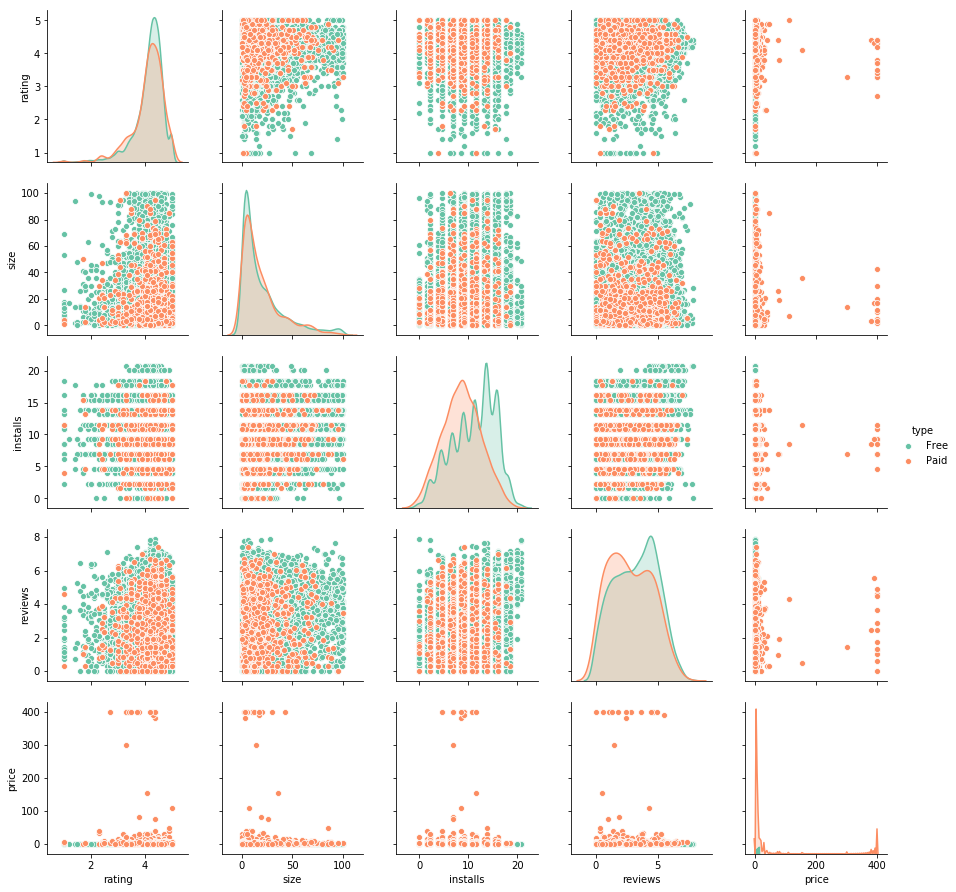

In [22]:
# first impression (basic EDA)
# from kaggle notebook :D
x = df['rating'].dropna()
y = df['size'].dropna()
z = df['installs'][df.installs!=0].dropna()
p = df['reviews'][df.reviews!=0].dropna()
t = df['type'].dropna()
price = df['price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['rating','size', 'installs', 'reviews', 'type', 'price']), hue='type', palette="Set2")

In [24]:
reviews_df = pd.read_csv('input/googleplaystore_user_reviews.csv')

In [27]:
# replace all the " " with "_" in the column name and lowercase them
## makes it easier to work with them
try:
    reviews_df.columns=[str(col).replace(' ','_').lower() for col in reviews_df.columns]
except KeyError:
    pass

In [28]:
reviews_df

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [29]:
merged_df = pd.merge(df, reviews_df, on = "app", how = "inner")
merged_df = merged_df.dropna(subset=['sentiment', 'translated_review'])
merged_df

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000
10,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Love,Positive,0.500000,0.600000
11,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love enjoyable fun,Positive,0.433333,0.466667
